<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Twitter
`Fecha de entrega: Mayo 20, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [3]:
import os
import pandas as pd
import json
import tweepy
import re 
import regex
import emoji
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

import scipy.cluster.hierarchy as sch
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

###  `[25 pts]` Punto 1: Extraer Tuits
Extraer mínimo 100 tuits de Twitter usando la API

❌ No escoger un tema de los que hicimos en clase (día de las madres, Giro de Italia, #EraGoldeYepes)

In [10]:
# Leer las llaves
keys = pd.read_csv("claves.csv", header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [81]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
tweets = tweepy.Cursor(api.search,
                       q=['reina del flow -RT'],
                       lang='es',
                       geocode='4.3646,-74.0414,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)


In [14]:
# Objeto generador
t = [tweet for tweet in tweets]
t_processed = []

for tweet in t:
    print (tweet.full_text)
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)
    

Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂
Empezó la reina del cringe, digo del flow
Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2
@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un "pirdin" y creen aue ya +
Top Series Netflix 🇨🇴 Mie26May

1. Quien mató a Sara
2. Pablo Escobar, el patrón del mal
3. Jurassic world campamento cretácico
4. El inocente
5. Chica Vampiro
6. La reina del flow
7. Yo soy Betty la fea
8. Sexify
9. Falsa identidad
10. Señora Acero
@CanalRCN Y eso que tiene que ver? También  hay actores de la reina del flow
@LovelyComplex26 Con esto mucho peor, y  deje de verme la reina d

In [15]:
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'fecha', 'ciudad', 'localizacion', 'id', 'enlace']
data.head()

,tweets,fecha,ciudad,localizacion,id,enlace
0,Cuando lo único que has visto de las instalaci...,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/139773947408...
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/139773470329...
2,Alguien más se ve la reina del flow? Y va al d...,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/139773075755...
3,@viccantillo @Atleti Realmente no se que esper...,2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/139766661230...
4,Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mat...,2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/139761660701...


In [84]:
import re 

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions
  
  
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data


,tweets,fecha,ciudad,localizacion,id,enlace,sent_vader,sent_textblob,traducido,sentimiento_vader,sentimiento_textblob,sent_flair,hora,texto_limpio,links,hashtags,mentions
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/1397739474084302850,0.8910,0.0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂,0.8910,0.000000,0.991761,02:00:00,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,[],[],[]
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/1397734703298396160,0.0000,0.0,"The queen of the cringe began, I say of the flow",0.0000,0.000000,0.984585,02:00:00,"Empezó la reina del cringe, digo del flow",[],[],[]
2,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/1397730757557342208,0.0000,0.0,Does anyone else see the queen of flow? And is it up to date? I need someone to comment with because today there is going to be a VISAJE # LaReinaDelFlow2,0.0000,0.000000,-0.639240,01:00:00,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE,[],[#LaReinaDelFlow2],[]
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/1397666612300455936,-0.6808,0.0,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +",0.7543,0.150000,0.664429,21:00:00,"Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",[],[],"[@viccantillo, @Atleti]"
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/1397616607019601935,0.2023,0.5,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero",-0.8750,-0.216667,0.999991,18:00:00,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,@Krl77777 Que tiene que ver la reina del flow?,2021-05-20 01:21:25,Bogotá,"Bogotá, D.C., Colombia",1395187877454270464,https://twitter.com/i/web/stuatus

In [85]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list
  
  

data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data.head()


,tweets,fecha,ciudad,localizacion,id,enlace,sent_vader,sent_textblob,traducido,sentimiento_vader,sentimiento_textblob,sent_flair,hora,texto_limpio,links,hashtags,mentions,emojis
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/1397739474084302850,0.8910,0.0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂,0.8910,0.000000,0.991761,02:00:00,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,[],[],[],"[😂, 😂, 😂, 😂]"
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/1397734703298396160,0.0000,0.0,"The queen of the cringe began, I say of the flow",0.0000,0.000000,0.984585,02:00:00,"Empezó la reina del cringe, digo del flow",[],[],[],[]
2,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/1397730757557342208,0.0000,0.0,Does anyone else see the queen of flow? And is it up to date? I need someone to comment with because today there is going to be a VISAJE # LaReinaDelFlow2,0.0000,0.000000,-0.639240,01:00:00,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE,[],[#LaReinaDelFlow2],[],[]
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/1397666612300455936,-0.6808,0.0,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +",0.7543,0.150000,0.664429,21:00:00,"Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",[],[],"[@viccantillo, @Atleti]",[]
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/1397616607019601935,0.2023,0.5,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero",-0.8750,-0.216667,0.999991,18:00:00,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",[],[],[],[]


In [86]:
data['hora'] = data['fecha'].dt.floor('H').dt.time
temp = pd.DataFrame(data.hora.value_counts()).reset_index()
temp.columns = ['hora', 'cnt']
temp = temp.sort_values('hora')
temp


,hora,cnt
4,00:00:00,4
2,01:00:00,6
0,02:00:00,20
14,03:00:00,1
10,04:00:00,2
16,05:00:00,1
13,08:00:00,1
17,10:00:00,1
7,12:00:00,3
1,13:00:00,6


###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

In [87]:
trace = go.Scatter(x=temp.hora.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.hora.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Horas',
                   line={'color': 'blue'})

layout = go.Layout(title="Número de tuits por hora")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [88]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.texto_limpio.values)

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
temp = pd.DataFrame(tfidf.toarray())
temp = cosine_similarity(temp.values)
temp = pd.DataFrame(temp)
# temp.columns = data.tweet
# temp.index = data.tweet
temp

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,1.000000,0.022919,0.012964,0.008906,0.010286,0.034659,0.010989,0.009906,0.011965,0.014493,...,0.020649,0.113866,0.123840,0.018179,0.008942,0.055621,0.0,0.011431,0.010725,0.015069
1,0.022919,1.000000,0.019374,0.013309,0.015372,0.051794,0.016423,0.014804,0.017881,0.021658,...,0.030858,0.019315,0.185067,0.027167,0.013363,0.083120,0.0,0.017082,0.016027,0.022519
2,0.012964,0.019374,1.000000,0.007528,0.008695,0.029298,0.009290,0.178480,0.010114,0.012251,...,0.017455,0.010926,0.104684,0.015367,0.007559,0.047017,0.0,0.009662,0.009066,0.185243
3,0.008906,0.013309,0.007528,1.000000,0.005973,0.020127,0.106059,0.068264,0.006948,0.008416,...,0.011991,0.044758,0.071914,0.093002,0.061622,0.032299,0.0,0.006638,0.006228,0.008751
4,0.010286,0.015372,0.008695,0.005973,1.000000,0.023246,0.007371,0.006644,0.008025,0.009721,...,0.013849,0.008669,0.083060,0.012193,0.005998,0.037305,0.0,0.756695,0.007193,0.010107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.055621,0.083120,0.047017,0.032299,0.037305,0.623126,0.039856,0.178101,0.043395,0.052562,...,0.074889,0.046876,0.449137,0.065931,0.032432,1.000000,0.0,0.041456,0.038896,0.054651
67,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
68,0.011431,0.017082,0.009662,0.006638,0.756695,0.025832,0.008191,0.007383,0.008918,0.010802,...,0.015390,0.009633,0.092301,0.013549,0.006665,0.041456,0.0,1.000000,0.007994,0.011231
69,0.010725,0.016027,0.009066,0.006228,0.007193,0.213525,0.007685,0.006927,0.008367,0.010135,...,0.014440,0.009039,0.086602,0.012713,0.006253,0.038896,0.0,0.007994,1.000000,0.062840


In [90]:
trace = go.Heatmap(z=temp.values.tolist(),
                   x=temp.index.values,
                   y=temp.columns.values,
                   colorscale='Oranges')

layout = go.Layout(title='🔥 Mapa de calor entre tweets 🔥',
                   width=800, height=800)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

In [91]:
import scipy.cluster.hierarchy as sch
import numpy as np

pairwise_distances = sch.distance.pdist(temp)
linkage = sch.linkage(pairwise_distances, method='ward')
idx_to_cluster_array = sch.fcluster(linkage, pairwise_distances.max() * 0.5, criterion='distance')
idx = np.argsort(idx_to_cluster_array)
temp = temp.copy()
    
temp2 = temp.iloc[idx, :].T.iloc[idx, :]
my_idx = idx_to_cluster_array

temp2.index = ['tweet #'+str(i) for i in temp2.columns]
temp2.columns = temp2.index

In [92]:
trace = go.Heatmap(z=temp2.values.tolist(),
                   x=temp2.index.values,
                   y=temp2.columns.values,
                   colorscale='Oranges')

layout = go.Layout(title='🔥 Mapa de calor entre tweets (ordenado) 🔥',
                  width=800, height=800)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

## Taller 12

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [17]:
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'fecha', 'ciudad', 'localizacion', 'id', 'enlace']
data.head()

,tweets,fecha,ciudad,localizacion,id,enlace
0,Cuando lo único que has visto de las instalaci...,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/139773947408...
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/139773470329...
2,Alguien más se ve la reina del flow? Y va al d...,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/139773075755...
3,@viccantillo @Atleti Realmente no se que esper...,2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/139766661230...
4,Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mat...,2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/139761660701...


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
#vader.polarity_scores("It was a horrible hotel but at least the employees were kind")

In [19]:
from textblob import TextBlob

In [20]:
pd.set_option('display.max_colwidth', None)

data['sent_vader'] = data['tweets'].apply(lambda val: vader.polarity_scores(val)['compound'])
data['sent_textblob'] = data['tweets'].apply(lambda val: TextBlob(val).sentiment.polarity)
data[['tweets', 'sent_vader', 'sent_textblob']].head()

data[['tweets', 'sent_vader']].sort_values('sent_vader').tail()

#pip3 install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

,tweets,sent_vader
44,"Si me ven en la reina del flow me mandan una foto, salgo actuando como la mera nena 😂",0.4404
21,Fiesta con el soundtrack de la reina del flow o que,0.4767
59,mk de un capítulo a otro de la reina del flow le cambiaron la tintura a un personaje XD pasaron como cinco minutos qué putas,0.6739
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,0.8910
42,"@laprincesitaPM https://t.co/I65ZSjcGjz aquí y en grupos a LRDF en ig y Facebook. Soy de Europa Este, Bulgaria y soy re fanática a LRDF y Carlos Torres y encontré métodos ver antes de Netflix esta temporada. No podría esperar por Netflix. ✌️💖👑 💖💖💖💖💖💖💖",0.9936


In [27]:
data['sentimiento_vader'] = data['traducido'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['traducido'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()

,tweets,fecha,ciudad,localizacion,id,enlace,sent_vader,sent_textblob,traducido,sentimiento_vader,sentimiento_textblob
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/1397739474084302850,0.8910,0.0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂,0.8910,0.000000
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/1397734703298396160,0.0000,0.0,"The queen of the cringe began, I say of the flow",0.0000,0.000000
2,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/1397730757557342208,0.0000,0.0,Does anyone else see the queen of flow? And is it up to date? I need someone to comment with because today there is going to be a VISAJE # LaReinaDelFlow2,0.0000,0.000000
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/1397666612300455936,-0.6808,0.0,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +",0.7543,0.150000
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/1397616607019601935,0.2023,0.5,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero",-0.8750,-0.216667


In [28]:
pd.set_option('display.max_colwidth', None)
data[['traducido', 'sentimiento_vader']].sort_values('sentimiento_vader')

,traducido,sentimiento_vader
14,Gema&#39;s death scene in La reina del flow is so terrible 😣😭,-0.8999
35,"Top Series Netflix 🇨🇴 Sab22May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous field 4. The innocent 5. The queen of flow 6. Vampire girl 7. I am Betty the ugly 8. Sexify 9. False identity 10. Jupiter&#39;s legacy",-0.8750
68,"Top Series Netflix 🇨🇴 Wed19May 1. Pablo Escobar, the patron of evil⬆️1 2. The innocent⬇️ 1 3. Sexify⬆️1 4. The queen of flow⬆️2 5. The legacy of Jupiter⬇️2 6. Chica Vampiro⬆️3 7. I&#39;m Betty the ugly⬅️ 8. Chichipatos⬇️3 9. Who killed Sara? ⬆️ 1 10. False identity ⬅️",-0.8750
30,"Top Series Netflix 🇨🇴 Sun23May 1. Who killed Sara 2. Jurassic world cretaceous field⬆️1 3. Pablo Escobar, the patron of evil⬇️1 4. The innocent 5. Chica Vampiro⬆️ 1 6. The queen of flow⬇️1 7 Sexify⬆️ 1 8. I&#39;m ugly Betty⬇️1 9. Jupiter&#39;s legacy⬆️ 1 10. False identity⬇️1",-0.8750
4,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero",-0.8750
...,...,...
52,I have just seen the queen of flow ... And now what will be of my free time haha 🤦🏻‍♀️,0.7430
3,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +",0.7543
48,Thanks to @ElUniversalCtg partners for such an excellent note @hpalau @JuanPalauMusic https://t.co/GL1wItcTDE,0.7650
0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂,0.8910


In [24]:
import six
from google.cloud import translate_v2 as translate

In [25]:
translate_client = translate.Client()
def traducir(texto, lenguaje):
    if isinstance(texto, six.binary_type):
        texto = texto.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
    resultado = translate_client.translate(texto, target_language=lenguaje)
    return resultado['translatedText']

In [26]:
lenguaje = 'en'
data['traducido'] = data['tweets'].apply(lambda x: traducir(x,lenguaje))
data.head()

,tweets,fecha,ciudad,localizacion,id,enlace,sent_vader,sent_textblob,traducido
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/1397739474084302850,0.8910,0.0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/1397734703298396160,0.0000,0.0,"The queen of the cringe began, I say of the flow"
2,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/1397730757557342208,0.0000,0.0,Does anyone else see the queen of flow? And is it up to date? I need someone to comment with because today there is going to be a VISAJE # LaReinaDelFlow2
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/1397666612300455936,-0.6808,0.0,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +"
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/1397616607019601935,0.2023,0.5,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero"


In [29]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('sentiment')
sentence = Sentence(data.tweets[0])
classifier.predict(sentence)
print(data.tweets[0])
sentence.labels

2021-05-26 21:25:14,865 loading file C:\Users\Usuario\.flair\models\sentiment-en-mix-distillbert_4.pt
Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂


[POSITIVE (0.9918)]

In [30]:
def sent_flair(texto):
    frase = Sentence(texto)
    classifier.predict(frase)
    result = frase.labels[0]
    label = result.value
    score = result.score
    if label == 'NEGATIVE':
        return score * -1
    return score

data['sent_flair'] = data['tweets'].apply(lambda val: sent_flair(val))
data.head()


,tweets,fecha,ciudad,localizacion,id,enlace,sent_vader,sent_textblob,traducido,sentimiento_vader,sentimiento_textblob,sent_flair
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,2021-05-27 02:20:34,Bogotá,"Bogotá, D.C., Colombia",1397739474084302850,https://twitter.com/i/web/stuatus/1397739474084302850,0.8910,0.0,When the only thing you have seen of the facilities of the U in the last year is what appears in the novels 😂😂 as in the queen of flow 😂😂,0.8910,0.000000,0.991761
1,"Empezó la reina del cringe, digo del flow",2021-05-27 02:01:36,Bogotá,"Bogotá, D.C., Colombia",1397734703298396160,https://twitter.com/i/web/stuatus/1397734703298396160,0.0000,0.0,"The queen of the cringe began, I say of the flow",0.0000,0.000000,0.984585
2,Alguien más se ve la reina del flow? Y va al día? Necesito con quien comentar porque hoy va a estar un VISAJE #LaReinaDelFlow2,2021-05-27 01:45:55,Bogotá,"Bogotá, DC, Colombia",1397730757557342208,https://twitter.com/i/web/stuatus/1397730757557342208,0.0000,0.0,Does anyone else see the queen of flow? And is it up to date? I need someone to comment with because today there is going to be a VISAJE # LaReinaDelFlow2,0.0000,0.000000,-0.639240
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",2021-05-26 21:31:02,Bogotá,"Buenos Aires, Argentina",1397666612300455936,https://twitter.com/i/web/stuatus/1397666612300455936,-0.6808,0.0,"@viccantillo @Atleti I really do not know what viewers expect of a novel, they gave a 180 ° faith change to the novel, in case it was coming into a tailspin I can&#39;t imagine now with this, don&#39;t stop seeing me as the queen of flow for these results, but good later they come back with a &quot;pirdin&quot; and they believe that already +",0.7543,0.150000,0.664429
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",2021-05-26 18:12:20,Bogotá,"Bogotá, D.C., Colombia",1397616607019601935,https://twitter.com/i/web/stuatus/1397616607019601935,0.2023,0.5,"Top Series Netflix 🇨🇴 Wed26May 1. Who killed Sara 2. Pablo Escobar, the patron of evil 3. Jurassic world cretaceous camp 4. The innocent 5. Chica Vampiro 6. The queen of flow 7. I am Betty the ugly 8. Sexify 9. False identity 10. Mrs. Acero",-0.8750,-0.216667,0.999991


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [39]:
data[['tweets','sentimiento_vader']].sort_values('sentimiento_vader')[:2:]

,tweets,sentimiento_vader
14,La escena de la muerte de Gema en La reina del flow es tan terrible 😣😭,-0.8999
35,"Top Series Netflix 🇨🇴 Sab22May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campo cretácico\n4. El inocente\n5. La reina del flow\n6. Chica Vampiro\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. El legado de Jupiter",-0.8750


In [45]:
data[['tweets','sentimiento_vader']].sort_values('sentimiento_vader')[::-1]

,tweets,sentimiento_vader
42,"@laprincesitaPM https://t.co/I65ZSjcGjz aquí y en grupos a LRDF en ig y Facebook. Soy de Europa Este, Bulgaria y soy re fanática a LRDF y Carlos Torres y encontré métodos ver antes de Netflix esta temporada. No podría esperar por Netflix. ✌️💖👑 💖💖💖💖💖💖💖",0.9944
0,Cuando lo único que has visto de las instalaciones de la U en el último año es lo que sale en las novelas 😂😂 como en la reina del flow 😂😂,0.8910
48,Gracias a los parceros de @ElUniversalCtg por tan excelente nota \n\n@hpalau \n@JuanPalauMusic \n\nhttps://t.co/GL1wItcTDE,0.7650
3,"@viccantillo @Atleti Realmente no se que esperan de los televidentes de una novela, le dieron un cambio fe 180° a la novela, de por si venia en picada no me imagino ahora con esto, no deje de verme la reina del flow para estos resultados, pero buee ya despues vuelven con un ""pirdin"" y creen aue ya +",0.7543
52,Ya acabe de ver la reina del flow... Y ahora que será de mis tiempos libres jaja 🤦🏻‍♀️,0.7430
...,...,...
4,"Top Series Netflix 🇨🇴 Mie26May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campamento cretácico\n4. El inocente\n5. Chica Vampiro\n6. La reina del flow\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. Señora Acero",-0.8750
30,"Top Series Netflix 🇨🇴 Dom23May\n\n1. Quien mató a Sara\n2. Jurassic world campo cretácico⬆️1\n3. Pablo Escobar, el patrón del mal⬇️1\n4. El inocente\n5. Chica Vampiro⬆️ 1\n6. La reina del flow⬇️1\n7. Sexify⬆️ 1\n8. Yo soy Betty la fea⬇️1\n9. El legado de Jupiter⬆️ 1\n10. Falsa identidad⬇️1",-0.8750
68,"Top Series Netflix 🇨🇴 Mie19May\n\n1. Pablo Escobar, el patrón del mal⬆️1\n2. El inocente⬇️ 1\n3. Sexify⬆️1\n4. La reina del flow⬆️2\n5. El legado de Jupiter⬇️2\n6. Chica Vampiro⬆️3\n7. Yo soy Betty la fea⬅️\n8. Chichipatos⬇️3\n9. Quien mató a Sara?⬆️ 1\n10. Falsa identidad ⬅️",-0.8750
35,"Top Series Netflix 🇨🇴 Sab22May\n\n1. Quien mató a Sara\n2. Pablo Escobar, el patrón del mal\n3. Jurassic world campo cretácico\n4. El inocente\n5. La reina del flow\n6. Chica Vampiro\n7. Yo soy Betty la fea\n8. Sexify\n9. Falsa identidad\n10. El legado de Jupiter",-0.8750


In [42]:
data[['tweets','sentimiento_textblob']].sort_values('sentimiento_textblob')[:2:]

,tweets,sentimiento_textblob
14,La escena de la muerte de Gema en La reina del flow es tan terrible 😣😭,-1.0
11,"Lo peor de la Reina del Flow es el puto pez koi, que petardo es #LaReinaDelFlow2",-0.8


In [46]:
data[['tweets','sentimiento_textblob']].sort_values('sentimiento_textblob')[::-1]

,tweets,sentimiento_textblob
60,@MarceloMejia Que bien. Y la reina del flow? \n\nhttps://t.co/YLhSYjCaFQ,0.700000
29,¿Carolina Ramírez canta sus propias canciones en ‘La reina del flow 2’? https://t.co/dc3n6gdx5B,0.600000
48,Gracias a los parceros de @ElUniversalCtg por tan excelente nota \n\n@hpalau \n@JuanPalauMusic \n\nhttps://t.co/GL1wItcTDE,0.400000
7,Viendo la transmisión del Giro por el Canal Caracol el principal interrogante no es quién va a ganar la etapa de hoy sino quien carajos en sus cabales puede ver esa novela la Reina del Flow 2 que tanto promocionan,0.363095
52,Ya acabe de ver la reina del flow... Y ahora que será de mis tiempos libres jaja 🤦🏻‍♀️,0.300000
...,...,...
37,"Me empecé a ver la reina del flow 1 y estoy adictísima, perdóname Diosito por darle rating a un canal tan nefasto como Caracol :( https://t.co/nL5BrK7VWX",-0.635000
65,"Caracol tv con su novela la reina del flow, transmite un mensaje absurdo sobre la juventud colombiana. No todos son antioqueños, cuyos ídolos son de los peores delincuentes que en esas tierras se han parido; ni aspiran a ser narcotraficantes, corruptos, sicarios, o prostitutas",-0.666667
22,Y yo me voy a perder la reina del Flow por esto :(,-0.750000
11,"Lo peor de la Reina del Flow es el puto pez koi, que petardo es #LaReinaDelFlow2",-0.800000


###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

### Cantidad Tweets postivos

In [53]:
data.sentimiento_vader[data.sentimiento_vader <= 0].size

50

In [54]:
data.sentimiento_textblob[data.sentimiento_textblob <= 0].size

56

### Cantidad de Tweets negativos

In [56]:
data.sentimiento_vader[data.sentimiento_vader >= 0].size

44

In [58]:
data.sentimiento_textblob[data.sentimiento_textblob >= 0].size

50

###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

In [74]:
sentimientosLRDF = ['Vader Positivo', 'Vader Negativo', 'Textblob Positivo', 'Textblob Negativo']
values = [data.sentimiento_vader[data.sentimiento_vader <= 0].size, 
        data.sentimiento_vader[data.sentimiento_vader > 0].size,
           data.sentimiento_textblob[data.sentimiento_textblob <= 0].size,
          data.sentimiento_textblob[data.sentimiento_textblob > 0].size]
            


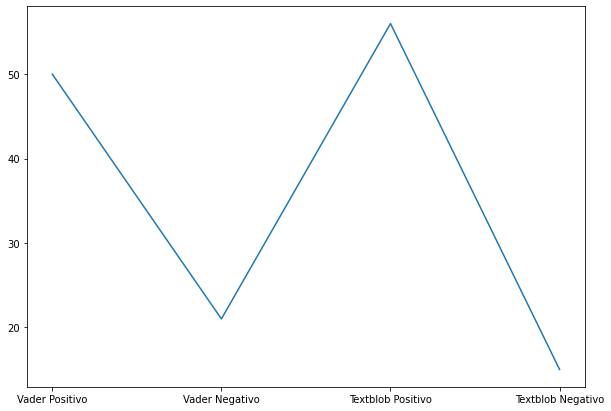

In [75]:
plt.figure(figsize=(10,7))
plt.plot(sentimientosLRDF, values)
plt.show()

#### En la gráfica se puede identificar que los cálculos por Textlob manejan en ambos limites un rango mayor frente a Vader. 